<a href="https://colab.research.google.com/github/adilrahman/algomox-assignment/blob/main/level_a/Level_A_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip *.zip

Archive:  AIQ1.zip
   creating: AIQ1/
  inflating: AIQ1/AIQ1.docx          
  inflating: AIQ1/aml_eval.csv       
  inflating: AIQ1/aml_train.csv      
  inflating: AIQ1/complaints-2021-09-08_07_12.csv  


## Import packages 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno # for visualize the null values in dataset

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
plt.rcParams["figure.figsize"] = (15,5)

## EDA AND FEATURE ENGINEERING

In [3]:
df = pd.read_csv("/content/AIQ1/aml_train.csv")
df.head()

,TxnID,token,TransactionType,amount,SenderID,PrevBalanceSender,CurrentBalanceSender,ReceiverID,PrevBalanceReceiver,CurrentBalanceReceiver,time,Sender Location,Receiver Location,IsSuspicious,Unnamed: 14
0,31977534500,578,Money Order,152372.18,UR37274825203,152372.18,0.00,UR36830343138,0.00,0.00,10-06-2019 02:23,Danville - Pennsylvania,Lumberton - Mississippi,1,15
1,56227886005,393,Money Order,1539880.97,UR34091506450,530514.00,0.00,UR15881981982,744923.33,2284804.29,02-06-2019 09:19,North Java - New York,Falmouth - Kentucky,0,26
2,15960169749,258,Cash Deposit,71514.14,UR25461871663,28044.00,99558.14,UR33481636683,81922.25,10408.12,27-05-2019 18:19,Petersburg - Illinois,Ledbetter - Texas,0,51
3,42677949513,570,Money Order,3712.11,UR36082311467,3712.11,0.00,UR30655051211,NaN,0.00,09-06-2019 18:19,Danville - Pennsylvania,Lumberton - Mississippi,1,13
4,23358983694,43,Cash Deposit,65913.36,UR34002111532,124336.14,190249.49,UR41907390101,336237.28,270323.92,18-05-2019 19:02,Trenton - Michigan,Lake Hubert - Minnesota,0,99


### ANALYSIS

In [4]:
df = pd.read_csv("/content/AIQ1/aml_train.csv")
df.head()

,TxnID,token,TransactionType,amount,SenderID,PrevBalanceSender,CurrentBalanceSender,ReceiverID,PrevBalanceReceiver,CurrentBalanceReceiver,time,Sender Location,Receiver Location,IsSuspicious,Unnamed: 14
0,31977534500,578,Money Order,152372.18,UR37274825203,152372.18,0.00,UR36830343138,0.00,0.00,10-06-2019 02:23,Danville - Pennsylvania,Lumberton - Mississippi,1,15
1,56227886005,393,Money Order,1539880.97,UR34091506450,530514.00,0.00,UR15881981982,744923.33,2284804.29,02-06-2019 09:19,North Java - New York,Falmouth - Kentucky,0,26
2,15960169749,258,Cash Deposit,71514.14,UR25461871663,28044.00,99558.14,UR33481636683,81922.25,10408.12,27-05-2019 18:19,Petersburg - Illinois,Ledbetter - Texas,0,51
3,42677949513,570,Money Order,3712.11,UR36082311467,3712.11,0.00,UR30655051211,NaN,0.00,09-06-2019 18:19,Danville - Pennsylvania,Lumberton - Mississippi,1,13
4,23358983694,43,Cash Deposit,65913.36,UR34002111532,124336.14,190249.49,UR41907390101,336237.28,270323.92,18-05-2019 19:02,Trenton - Michigan,Lake Hubert - Minnesota,0,99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TxnID                   4000 non-null   int64  
 1   token                   4000 non-null   int64  
 2   TransactionType         4000 non-null   object 
 3   amount                  4000 non-null   float64
 4   SenderID                4000 non-null   object 
 5   PrevBalanceSender       4000 non-null   float64
 6   CurrentBalanceSender    4000 non-null   float64
 7   ReceiverID              4000 non-null   object 
 8   PrevBalanceReceiver     3757 non-null   float64
 9   CurrentBalanceReceiver  4000 non-null   float64
 10  time                    4000 non-null   object 
 11  Sender Location         3760 non-null   object 
 12  Receiver Location       3776 non-null   object 
 13  IsSuspicious            4000 non-null   int64  
 14  Unnamed: 14             4000 non-null   

**Checking null values**


---


In [6]:
def null_values_percentage(df):
  '''
  description:
    This function help to find the percentage of unique values exist in 
    each feature/columns
  '''
  total_count = df.shape[0]
  print(f"-------------------> {total_count} [records] <-------------\n")
  for col in df.columns:
    null_count = df[col].isnull().sum()

    #print only null values details 
    if null_count == 0.0: continue 

    print(f"{null_count/total_count*100:0.3f}% \t:\t {col}")

  #visualize the missing values
  plt.figure(figsize=(1,5)) 
  msno.bar(df)


-------------------> 4000 [records] <-------------

6.075% 	:	 PrevBalanceReceiver
6.000% 	:	 Sender Location
5.600% 	:	 Receiver Location


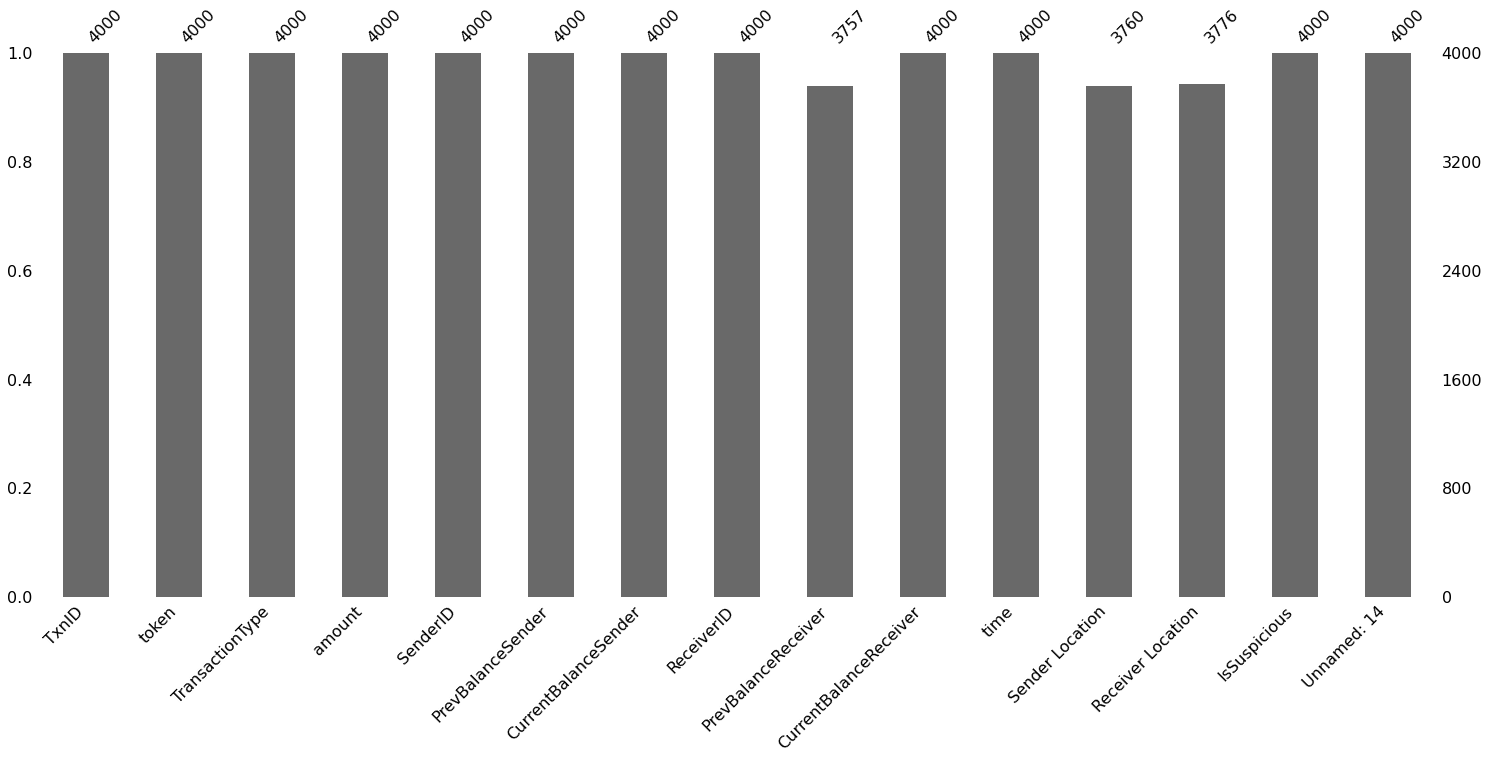

In [7]:
null_values_percentage(df)

<h3><b>Observation 🕵️</b></h3>

----

  - Only 3 features/columns consist **null values**
  - each of thems are less than ( < 7% ) null values exists
  ```
      * PrevBalanceReceiver - 6.07%
      * Sender Location     - 6.00%
      * Receiver Location   - 5.60%

  ```
  - most probabily we don't use the **Sender Location** and **Receiver Location** for this problem so we can drop those columns in future and only need to take care of **PrevBalanceReceiver** column


**Checking unique**


---


In [8]:
def find_unique_values(df):
  '''
  description:
    This function is help to find the unique values for each features/columns
  '''
  for col in df.columns:
    unique_values = len(df[col].unique())
    print(f"{unique_values} \t:\t {col}")

In [9]:
find_unique_values(df)

4000 	:	 TxnID
524 	:	 token
5 	:	 TransactionType
3978 	:	 amount
4000 	:	 SenderID
2762 	:	 PrevBalanceSender
1544 	:	 CurrentBalanceSender
4000 	:	 ReceiverID
2048 	:	 PrevBalanceReceiver
2394 	:	 CurrentBalanceReceiver
3557 	:	 time
2870 	:	 Sender Location
2913 	:	 Receiver Location
2 	:	 IsSuspicious
101 	:	 Unnamed: 14


<h3><b>Observation 🕵️</b></h3>

----

> ❌ - drop the columns/feature

> 🔎 - need more analysis

 **suspicious columns:** 

```
  
  1. TxnID ❌- it's just a unique numeric codes for every transaction it clearly don't consist any information about the behaviour of the transaction
  
  2. token 🔎 - it's just a token for of each transaction ,but even though every sender and receiver ID's are unique for every transaction it only have 524 unqiue values ?. need more analyisis
  
  3. SenderID ❌ - it's unique for every transactions so mostly don't have informations
  
  4. ReceiverID ❌- it's unique for every transactions so mostly don't have informations
  
  5. time 🔎- may be we can convert this into epoch format or something 
  
  6. Sender Location 🔎 - may be we can do some clustering or finding the distance b\w the sender and receiver location as a new feature 

  7. Receiver Location 🔎 - may be we can do some clustering or finding the distance b\w the sender and receiver location as a new feature 
  
  8. Unnamed: 14 ❌- it's may be some noise 
```

### **relationship b\w TransactionType and IsSuspicious**



---



In [10]:
df.groupby("TransactionType")["IsSuspicious"].sum()

TransactionType
Card                 0
Cash Deposit         0
Cash Withdrawal    218
Debit Card           0
Money Order        236
Name: IsSuspicious, dtype: int64

In [11]:
fig = px.histogram(df, x="TransactionType",
             color='IsSuspicious', barmode='group')
fig.show()

<h3><b>Observation 🕵️</b></h3>

----

- The **money order** and **cash withdrawal** types of transaction are **more suspicious**

### **Anlysis TransactionType**



---

1. Money Order 
2. Cash Withdrawal


---

In [12]:
money_order_df = df[df["TransactionType"] == "Money Order"]

In [13]:
money_order_df.head()

,TxnID,token,TransactionType,amount,SenderID,PrevBalanceSender,CurrentBalanceSender,ReceiverID,PrevBalanceReceiver,CurrentBalanceReceiver,time,Sender Location,Receiver Location,IsSuspicious,Unnamed: 14
0,31977534500,578,Money Order,152372.18,UR37274825203,152372.18,0.0,UR36830343138,0.00,0.00,10-06-2019 02:23,Danville - Pennsylvania,Lumberton - Mississippi,1,15
1,56227886005,393,Money Order,1539880.97,UR34091506450,530514.00,0.0,UR15881981982,744923.33,2284804.29,02-06-2019 09:19,North Java - New York,Falmouth - Kentucky,0,26
3,42677949513,570,Money Order,3712.11,UR36082311467,3712.11,0.0,UR30655051211,NaN,0.00,09-06-2019 18:19,Danville - Pennsylvania,Lumberton - Mississippi,1,13
27,53122645251,181,Money Order,344821.99,UR41133848874,0.00,0.0,UR28599267859,966169.93,1310991.93,24-05-2019 13:29,Longmire - Washington,China - Texas,0,87
42,14816881034,625,Money Order,2480321.85,UR33442647604,2480321.85,0.0,UR31571734314,0.00,0.00,12-06-2019 01:19,Danville - Pennsylvania,NaN,1,75


In [14]:
pvt_table = pd.pivot_table(money_order_df, index=["IsSuspicious"],
                               values=['amount','PrevBalanceSender','CurrentBalanceSender',"PrevBalanceReceiver","CurrentBalanceReceiver"],
                               aggfunc=[np.mean, np.sum])

cm = sns.light_palette("green", as_cmap=True)
pvt_table.style.background_gradient(cmap=cm)

In [15]:
px.box(money_order_df, x = "IsSuspicious", y = "amount")

<h3><b>Observation 🕵️</b></h3>

----
- from this box plot we cannot say that the **amount** could be a discriminating factor for classifing as **Suspicious** or **not Suspicious**

- but all **money order transaction** we can see that the **PrevBalanceReceiver** are **0 for every Suspicious transaction**

In [16]:
cash_withdrawal_df = df[df["TransactionType"] == "Cash Withdrawal"]

In [17]:
cash_withdrawal_df.head()

,TxnID,token,TransactionType,amount,SenderID,PrevBalanceSender,CurrentBalanceSender,ReceiverID,PrevBalanceReceiver,CurrentBalanceReceiver,time,Sender Location,Receiver Location,IsSuspicious,Unnamed: 14
6,43246507782,188,Cash Withdrawal,19396.33,UR21491149598,0.0,0.0,UR33785234157,66066.60,85462.94,24-05-2019 20:13,Rio Medina - Texas,Paradise - Pennsylvania,0,23
7,19374613613,156,Cash Withdrawal,445674.17,UR35888861024,0.0,0.0,UR13198230388,516289.23,965735.07,23-05-2019 12:43,NaN,Humacao - Puerto Rico,0,51
8,67221442337,254,Cash Withdrawal,60275.97,UR12393635687,21318.0,0.0,UR42808174219,12979.08,73255.05,27-05-2019 14:04,Ivy - Virginia,East Otis - Massachusetts,0,89
9,44430603796,330,Cash Withdrawal,382935.26,UR40794260104,500.0,0.0,UR16424345394,0.00,382935.26,30-05-2019 18:04,Washington - Washington - D.C.,Mc Gregor - Texas,0,53
10,54265937865,227,Cash Withdrawal,267765.40,UR26452356617,11239.0,0.0,UR34454181483,846138.87,1113904.26,26-05-2019 11:40,Mississippi State - Mississippi,Suitland - Maryland,0,14


In [18]:
pvt_table = pd.pivot_table(cash_withdrawal_df, index=["IsSuspicious"],
                               values=['amount','PrevBalanceSender','CurrentBalanceSender',"PrevBalanceReceiver","CurrentBalanceReceiver"],
                               aggfunc=[np.mean, np.sum])

cm = sns.light_palette("green", as_cmap=True)
pvt_table.style.background_gradient(cmap=cm)

In [19]:
px.box(cash_withdrawal_df, x = "IsSuspicious", y = "amount")

<h3><b>Observation 🕵️</b></h3>

----

- in cash withdrawal transactions the suspicious class having a searious correlation b\w **amount** and **CurrentBalanceSender**

<br>

**NOTES:**


> 1. **The amount of transaction is always higher in suspicious catagory of transactions**
> 2. **After every transactions in suspicious catagory the current balance are become empty**




### **relationship b\w TransactionType and Amount**



---


In [20]:
## pie plot based on each transactions counts
fig = px.pie(df, names='TransactionType',title="transaction counts")
fig.show()


In [21]:
## pie plot based on amount
fig = px.pie(df, values='amount', names='TransactionType', title="amount distribution in each transaction")
fig.show()

## FEATURE ENGINEERING

In [22]:
new_df = df.copy()

In [23]:
## drop unnecessary columns
drop_cols = ["TxnID","SenderID","ReceiverID","Unnamed: 14","token","time","Sender Location","Receiver Location"] 

In [24]:
new_df.drop(drop_cols,axis = 1,inplace = True)

In [25]:
new_df.head()

,TransactionType,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver,IsSuspicious
0,Money Order,152372.18,152372.18,0.00,0.00,0.00,1
1,Money Order,1539880.97,530514.00,0.00,744923.33,2284804.29,0
2,Cash Deposit,71514.14,28044.00,99558.14,81922.25,10408.12,0
3,Money Order,3712.11,3712.11,0.00,NaN,0.00,1
4,Cash Deposit,65913.36,124336.14,190249.49,336237.28,270323.92,0


### Fixing the null Values 


---



-------------------> 4000 [records] <-------------

6.075% 	:	 PrevBalanceReceiver


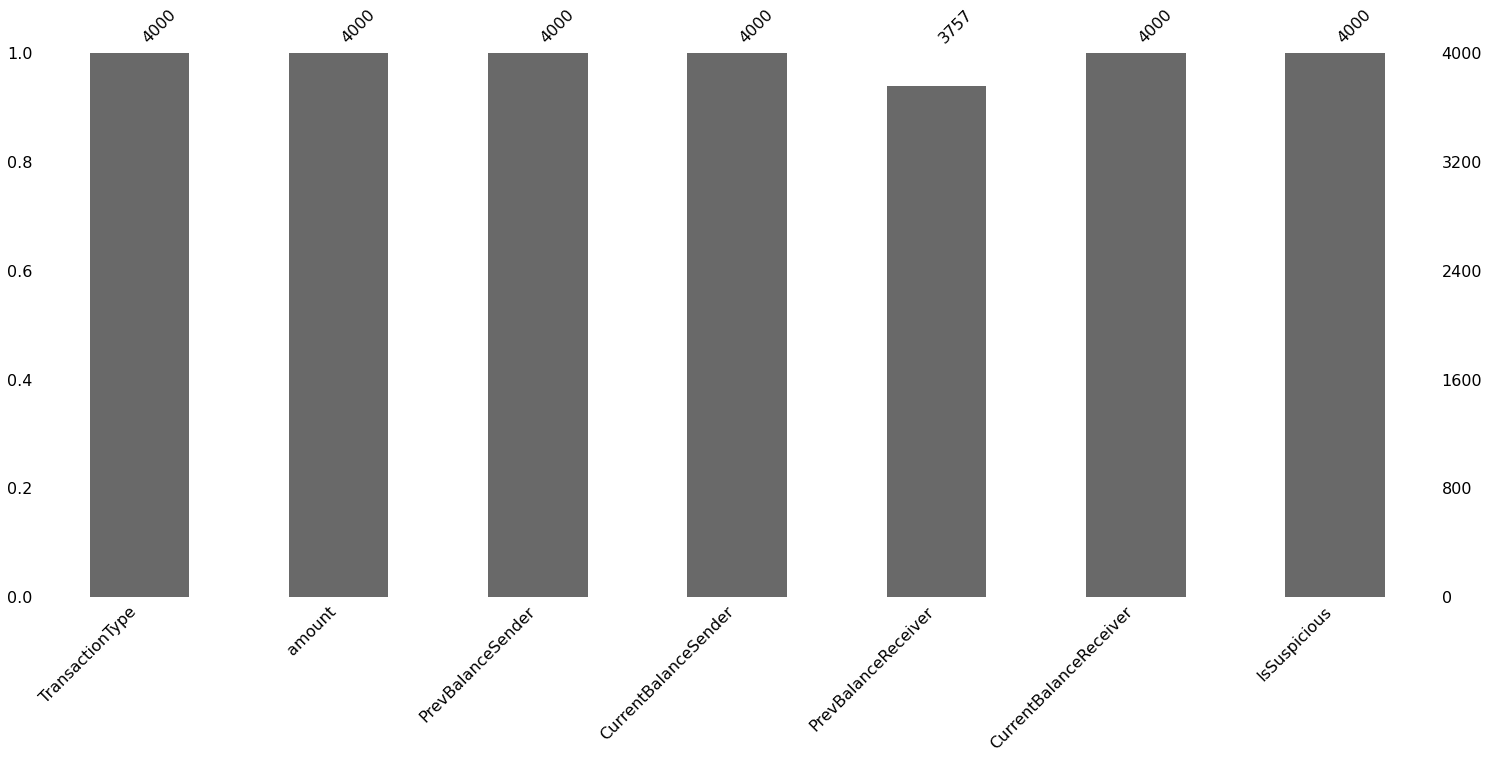

In [26]:
null_values_percentage(new_df)

**NOTE:**
  - The number of null values are small so we can remove those records/rows from the dataset
    - because the **prevBalanceReceiever** is a importent feature in **money order** transaction for predicting suspicious, so we cannot **impute** their value simply by using either **freaquency** or **central tendancy** 

-------------------> 3757 [records] <-------------



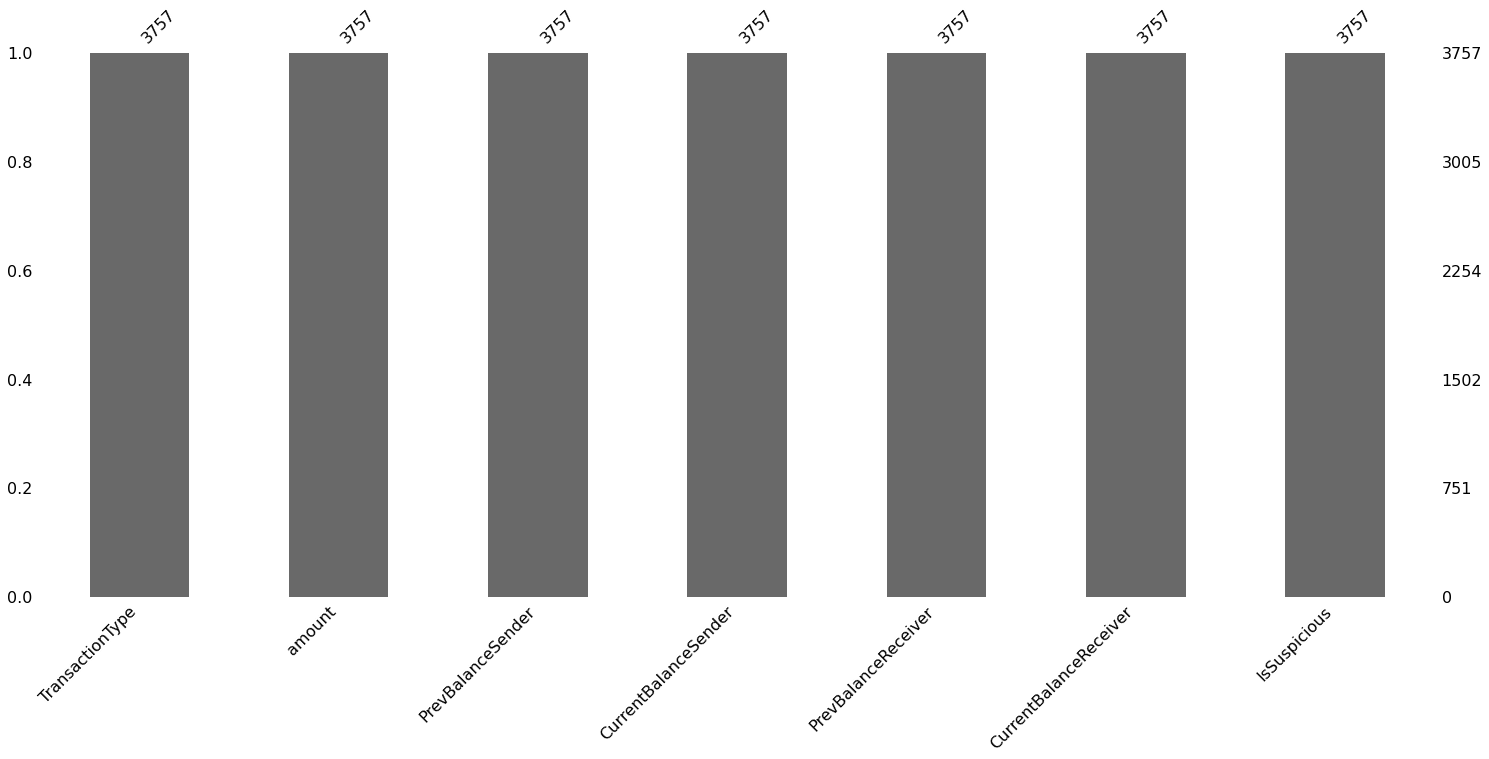

In [27]:
new_df.dropna(axis = 0,inplace = True)
null_values_percentage(new_df)

### Label Encoding for Transaction Type 


---



**NOTE:**
  - In Transaction type there is no ordinal type of relationship b\w the values so we can use **ONE-HOT ENCODING** method

In [28]:
transaction_type = pd.get_dummies(new_df["TransactionType"])
transaction_type

,Card,Cash Deposit,Cash Withdrawal,Debit Card,Money Order
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
4,0,1,0,0,0
5,0,1,0,0,0
...,...,...,...,...,...
3995,0,0,1,0,0
3996,0,0,1,0,0
3997,0,0,1,0,0
3998,0,1,0,0,0


In [29]:
X_data = pd.concat([transaction_type, new_df], axis = 1).copy()
X_data

,Card,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,TransactionType,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver,IsSuspicious
0,0,0,0,0,1,Money Order,152372.18,152372.18,0.00,0.00,0.00,1
1,0,0,0,0,1,Money Order,1539880.97,530514.00,0.00,744923.33,2284804.29,0
2,0,1,0,0,0,Cash Deposit,71514.14,28044.00,99558.14,81922.25,10408.12,0
4,0,1,0,0,0,Cash Deposit,65913.36,124336.14,190249.49,336237.28,270323.92,0
5,0,1,0,0,0,Cash Deposit,8785.84,11924687.58,11933473.42,2025093.96,2016308.11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,1,0,0,Cash Withdrawal,177210.58,0.00,0.00,857000.94,1034211.52,0
3996,0,0,1,0,0,Cash Withdrawal,245366.77,0.00,0.00,2736028.05,2981394.82,0
3997,0,0,1,0,0,Cash Withdrawal,380336.83,0.00,0.00,1844378.61,2224715.44,0
3998,0,1,0,0,0,Cash Deposit,251792.66,3428255.46,3680048.12,32665551.13,32413758.47,0


In [30]:
X_data.drop(["TransactionType"],axis = 1, inplace = True)

In [31]:
X_data

,Card,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver,IsSuspicious
0,0,0,0,0,1,152372.18,152372.18,0.00,0.00,0.00,1
1,0,0,0,0,1,1539880.97,530514.00,0.00,744923.33,2284804.29,0
2,0,1,0,0,0,71514.14,28044.00,99558.14,81922.25,10408.12,0
4,0,1,0,0,0,65913.36,124336.14,190249.49,336237.28,270323.92,0
5,0,1,0,0,0,8785.84,11924687.58,11933473.42,2025093.96,2016308.11,0
...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,1,0,0,177210.58,0.00,0.00,857000.94,1034211.52,0
3996,0,0,1,0,0,245366.77,0.00,0.00,2736028.05,2981394.82,0
3997,0,0,1,0,0,380336.83,0.00,0.00,1844378.61,2224715.44,0
3998,0,1,0,0,0,251792.66,3428255.46,3680048.12,32665551.13,32413758.47,0


### Base Model Evaluation

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [33]:
def base_model_evaluation(X_train,y_train,X_test,y_test,model =  RandomForestClassifier()):
  '''
  description: 
    it fit the training dataset into a base model 
    and evaluate on train and test and generate the
    classification report 
  '''
  base_model = model
  base_model.fit(X_train, y_train)
  train_pred = base_model.predict(X_train) 
  test_pred = base_model.predict(X_test)
  train_report = classification_report(y_train, train_pred)
  test_report = classification_report(y_test, test_pred)
  print("---"*10+"=> Train report <="+"---"*10 + "\n")
  print(train_report)
  print("---"*10+"=> Test report <="+"---"*10 + "\n")
  print(test_report)

In [34]:
tmp_X_data = X_data.copy()

In [35]:
def splitting_df(df):
  '''
  description:
    it split the data into dependant and independant
    after that it split those into train and test dataset
  '''

  X = df.drop(["IsSuspicious"],axis = 1)
  y = df["IsSuspicious"]

  X_train, X_test , y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 1337)

  return (X_train, X_test , y_train, y_test)

In [36]:
tmp_X_data

,Card,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver,IsSuspicious
0,0,0,0,0,1,152372.18,152372.18,0.00,0.00,0.00,1
1,0,0,0,0,1,1539880.97,530514.00,0.00,744923.33,2284804.29,0
2,0,1,0,0,0,71514.14,28044.00,99558.14,81922.25,10408.12,0
4,0,1,0,0,0,65913.36,124336.14,190249.49,336237.28,270323.92,0
5,0,1,0,0,0,8785.84,11924687.58,11933473.42,2025093.96,2016308.11,0
...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,1,0,0,177210.58,0.00,0.00,857000.94,1034211.52,0
3996,0,0,1,0,0,245366.77,0.00,0.00,2736028.05,2981394.82,0
3997,0,0,1,0,0,380336.83,0.00,0.00,1844378.61,2224715.44,0
3998,0,1,0,0,0,251792.66,3428255.46,3680048.12,32665551.13,32413758.47,0


In [37]:
 X_train, X_test , y_train, y_test = splitting_df(tmp_X_data)
 X_train.shape , X_test.shape

((2629, 10), (1128, 10))

In [38]:
base_model_evaluation(X_train,y_train,X_test,y_test)

------------------------------=> Train report <=------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00       319

    accuracy                           1.00      2629
   macro avg       1.00      1.00      1.00      2629
weighted avg       1.00      1.00      1.00      2629

------------------------------=> Test report <=------------------------------

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1024
           1       0.97      0.92      0.95       104

    accuracy                           0.99      1128
   macro avg       0.98      0.96      0.97      1128
weighted avg       0.99      0.99      0.99      1128



**NOTE**
  - According to problem statement "`Catching suspicious transactions is far more important than normal transactions.`"
    
<h3> So, The <b>metric recall</b> must be <b>higher</b> for <b>class 1</b> </h3>

### Checking **IsSuspicious** distribution [ balanced or not ]

In [39]:
X_data_new = pd.concat([X_train, y_train], axis = 1).reset_index()
X_data_new

,index,Card,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver,IsSuspicious
0,1786,0,0,1,0,0,185428.47,2170.00,0.00,0.00,354385.38,0
1,1769,1,0,0,0,0,9340.27,13475.00,4134.73,0.00,0.00,0
2,2569,0,0,0,0,1,649242.03,54482.00,0.00,9706.15,658948.18,0
3,1380,0,0,1,0,0,416199.84,101390.00,0.00,1663880.13,2080079.97,0
4,1647,0,1,0,0,0,96844.93,9231.00,106075.93,11282.37,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2624,3450,1,0,0,0,0,13410.31,0.00,0.00,0.00,0.00,0
2625,1339,0,1,0,0,0,19006.43,9468150.65,9487157.08,36875.00,17868.57,0
2626,920,0,0,0,0,1,82112.74,82112.74,0.00,0.00,0.00,1
2627,200,1,0,0,0,0,2764.35,16453.00,13688.65,0.00,0.00,0


In [40]:
fig = px.pie(X_data_new, names='IsSuspicious', title="`IsSuspicious` class distribution in dataset")
fig.show()

**NOTE:**
  - it's highly imbalanced 

<h3><b> fixing imbalance </b></h3>

----

In [41]:
from imblearn.over_sampling import SMOTE # we are synthesising new datapoints to fix the imbalance in suspicious class
from collections import Counter

In [42]:
sm = SMOTE(random_state = 1337)

In [43]:
X_train_new , y_train_new = sm.fit_resample(X_train, y_train)

In [44]:
X_data_new = pd.concat([X_train_new, y_train_new], axis = 1).reset_index()
X_data_new

,index,Card,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver,IsSuspicious
0,0,0,0,1,0,0,1.854285e+05,2.170000e+03,0.00,0.000000e+00,3.543854e+05,0
1,1,1,0,0,0,0,9.340270e+03,1.347500e+04,4134.73,0.000000e+00,0.000000e+00,0
2,2,0,0,0,0,1,6.492420e+05,5.448200e+04,0.00,9.706150e+03,6.589482e+05,0
3,3,0,0,1,0,0,4.161998e+05,1.013900e+05,0.00,1.663880e+06,2.080080e+06,0
4,4,0,1,0,0,0,9.684493e+04,9.231000e+03,106075.93,1.128237e+04,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4615,4615,0,0,1,0,0,1.577943e+04,1.577943e+04,0.00,0.000000e+00,1.577943e+04,1
4616,4616,0,0,1,0,0,1.917980e+04,1.917980e+04,0.00,0.000000e+00,1.917980e+04,1
4617,4617,0,0,1,0,0,2.315766e+05,2.315766e+05,0.00,2.206882e+06,2.438459e+06,1
4618,4618,0,0,1,0,0,4.163646e+05,4.163646e+05,0.00,3.056263e+05,7.219908e+05,1


In [45]:
##shuffiling the dataset 
X_data_new = X_data_new.sample(frac = 1).reset_index()

In [46]:
X_data_new

,level_0,index,Card,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver,IsSuspicious
0,2079,2079,0,0,1,0,0,13962.000000,1.396200e+04,0.00,0.000000e+00,1.396200e+04,1
1,3196,3196,0,0,0,0,1,374938.973656,3.749390e+05,0.00,0.000000e+00,0.000000e+00,1
2,1316,1316,0,0,1,0,0,20734.780000,0.000000e+00,0.00,4.811074e+05,5.018422e+05,0
3,1798,1798,1,0,0,0,0,6462.810000,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0
4,2038,2038,0,1,0,0,0,197343.020000,5.187929e+06,5385271.67,8.928505e+05,6.955075e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,168,168,1,0,0,0,0,25028.160000,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0
4616,2235,2235,0,0,1,0,0,156827.740000,0.000000e+00,0.00,2.627733e+05,4.196010e+05,0
4617,3727,3727,0,0,1,0,0,261596.356337,2.615964e+05,0.00,3.951640e+05,6.567603e+05,1
4618,2721,2721,0,0,1,0,0,182792.044143,1.827920e+05,0.00,2.685042e+04,2.096425e+05,1


In [47]:
fig = px.pie(X_data_new, names='IsSuspicious', title="`IsSuspicious` class distribution in dataset")
fig.show()

In [48]:
y_train = X_data_new["IsSuspicious"]
X_train = X_data_new.drop(["IsSuspicious","level_0","index"],axis = 1)

In [49]:
X_train.head(5)

,Card,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver
0,0,0,1,0,0,13962.000000,1.396200e+04,0.00,0.00,13962.00
1,0,0,0,0,1,374938.973656,3.749390e+05,0.00,0.00,0.00
2,0,0,1,0,0,20734.780000,0.000000e+00,0.00,481107.43,501842.21
3,1,0,0,0,0,6462.810000,0.000000e+00,0.00,0.00,0.00
4,0,1,0,0,0,197343.020000,5.187929e+06,5385271.67,892850.49,695507.47


In [50]:
base_model_evaluation(X_train,y_train,X_test,y_test)

------------------------------=> Train report <=------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2310

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620

------------------------------=> Test report <=------------------------------

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1024
           1       0.90      0.97      0.94       104

    accuracy                           0.99      1128
   macro avg       0.95      0.98      0.96      1128
weighted avg       0.99      0.99      0.99      1128



### Scaling the Dataset

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
std = StandardScaler()

In [53]:
# transform X_train data into std norm
X_train_std = std.fit_transform(X_train)

In [54]:
## Transformed X_train datas
X_train_std = pd.DataFrame(columns=X_train.columns, data = X_train_std)
X_train_std

,Card,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver
0,-0.454166,-0.342084,1.174826,-0.051031,-0.642529,-0.431468,-0.389107,-0.203044,-0.357293,-0.441230
1,-0.454166,-0.342084,-0.851190,-0.051031,1.556349,-0.223272,-0.259043,-0.203044,-0.357293,-0.446794
2,-0.454166,-0.342084,1.174826,-0.051031,-0.642529,-0.427562,-0.394138,-0.203044,-0.126457,-0.246807
3,2.201840,-0.342084,-0.851190,-0.051031,-0.642529,-0.435794,-0.394138,-0.203044,-0.357293,-0.446794
4,-0.454166,2.923261,-0.851190,-0.051031,-0.642529,-0.325702,1.475126,2.254819,0.071099,-0.169631
...,...,...,...,...,...,...,...,...,...,...
4615,2.201840,-0.342084,-0.851190,-0.051031,-0.642529,-0.425086,-0.394138,-0.203044,-0.357293,-0.446794
4616,-0.454166,-0.342084,1.174826,-0.051031,-0.642529,-0.349070,-0.394138,-0.203044,-0.231214,-0.279581
4617,-0.454166,-0.342084,1.174826,-0.051031,-0.642529,-0.288643,-0.299882,-0.203044,-0.167693,-0.185072
4618,-0.454166,-0.342084,1.174826,-0.051031,-0.642529,-0.334094,-0.328276,-0.203044,-0.344410,-0.363251


In [55]:
# transform X_test data into std norm
X_test_std = std.transform(X_test)

In [56]:
## Transformed X_test datas
X_test_std = pd.DataFrame(columns=X_test.columns, data = X_test_std)
X_test_std

,Card,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver
0,-0.454166,-0.342084,-0.851190,-0.051031,1.556349,-0.283677,-0.394138,-0.203044,0.380119,0.273352
1,-0.454166,-0.342084,-0.851190,-0.051031,1.556349,0.055760,0.045798,-0.037709,0.325394,0.559565
2,-0.454166,-0.342084,1.174826,-0.051031,-0.642529,0.830831,0.399473,-0.203044,0.125600,0.832018
3,-0.454166,-0.342084,1.174826,-0.051031,-0.642529,-0.128889,-0.394138,-0.203044,2.123058,1.757721
4,2.201840,-0.342084,-0.851190,-0.051031,-0.642529,-0.426338,-0.350820,-0.158607,-0.357293,-0.446794
...,...,...,...,...,...,...,...,...,...,...
1123,-0.454166,-0.342084,-0.851190,19.595918,-0.642529,-0.439377,-0.394138,-0.203044,1.117010,0.777806
1124,-0.454166,-0.342084,1.174826,-0.051031,-0.642529,-0.407339,-0.394138,-0.203044,-0.220467,-0.310916
1125,2.201840,-0.342084,-0.851190,-0.051031,-0.642529,-0.435776,-0.394138,-0.203044,-0.357293,-0.446794
1126,-0.454166,2.923261,-0.851190,-0.051031,-0.642529,-0.390716,-0.384737,-0.152516,1.031501,0.672965


In [57]:
base_model_evaluation(X_train_std,y_train,X_test_std,y_test)

------------------------------=> Train report <=------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2310

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620

------------------------------=> Test report <=------------------------------

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1024
           1       0.90      0.97      0.94       104

    accuracy                           0.99      1128
   macro avg       0.95      0.98      0.96      1128
weighted avg       0.99      0.99      0.99      1128



## Model Selection

In [58]:
## models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [59]:
def get_model_names(obj):
  '''
  description:
    return the model name 
  
  Input:
    obj :- Model object
  '''
  name = str(obj).split("(")[0]
  return name

In [60]:

models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(),

          AdaBoostClassifier(), GaussianNB(), KNeighborsClassifier()]

In [61]:
model_names = [get_model_names(model) for model in models]
model_names

['LogisticRegression',
 'SVC',
 'DecisionTreeClassifier',
 'ExtraTreesClassifier',
 'RandomForestClassifier',
 'AdaBoostClassifier',
 'GaussianNB',
 'KNeighborsClassifier']

**Model Evaluation**

---



In [62]:
best_model = ""
best_model_score = 0
results = []

In [63]:
# cross validation 
for i,model in enumerate(models):
    score = cross_val_score(model, X_test_std, y_test, cv=10, scoring = 'accuracy').mean()
    name = model_names[i]

    result = cross_validate(model, X_test_std, y_test, cv=10, scoring=('accuracy','f1','recall','precision'))
    
    result = {
        "name" : name,
        "accuracy" : result["test_accuracy"],
        "precision" : result["test_precision"],
        "recall" : result["test_recall"],
        "f1_score" : result["test_f1"]
    }
    results.append(result)

    if score > best_model_score :
        best_model_score = score
        best_model = name


    print(f"{score:.6f} \t:\t {name}")

0.949479 	:	 LogisticRegression
0.961022 	:	 SVC
0.980491 	:	 DecisionTreeClassifier
0.985817 	:	 ExtraTreesClassifier
0.986710 	:	 RandomForestClassifier
0.976075 	:	 AdaBoostClassifier
0.636473 	:	 GaussianNB
0.976067 	:	 KNeighborsClassifier


In [64]:
#best perfoming model
best_model , best_model_score

('RandomForestClassifier', 0.9867098609355246)

In [65]:
## finding the mean of the cross validation
results = results[len(results) - 8:]
for x in results:
  x["accuracy"] = x["accuracy"].mean() * 100
  x["precision"] = x["precision"].mean() * 100
  x["recall"] = x["recall"].mean() * 100
  x["f1_score"] = x["f1_score"].mean() * 100
  

In [66]:
models_results = pd.DataFrame(results)
models_results

,name,accuracy,precision,recall,f1_score
0,LogisticRegression,94.947851,98.000000,46.272727,61.560691
1,SVC,96.102244,89.444444,67.545455,75.975084
2,DecisionTreeClassifier,97.963021,87.088745,93.090909,89.617781
3,ExtraTreesClassifier,98.493205,94.777778,88.272727,91.254804
4,RandomForestClassifier,98.670986,99.000000,86.363636,91.857561
5,AdaBoostClassifier,97.607459,89.333333,84.545455,86.562668
6,GaussianNB,63.647282,20.472327,98.090909,33.723732
7,KNeighborsClassifier,97.606669,95.527778,77.909091,85.330409


**saving results**



---



In [67]:
models_results.to_csv("models_results.csv")

**Random Forest Results**



---



In [68]:
model = RandomForestClassifier()

In [69]:
base_model_evaluation(X_train_std, y_train, X_test_std, y_test, model = model)

------------------------------=> Train report <=------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2310

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620

------------------------------=> Test report <=------------------------------

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1024
           1       0.91      0.97      0.94       104

    accuracy                           0.99      1128
   macro avg       0.95      0.98      0.97      1128
weighted avg       0.99      0.99      0.99      1128



In [70]:
y_pred = model.predict(X_train_std)
cm = confusion_matrix(y_train, y_pred)

**confusion metrics**



---



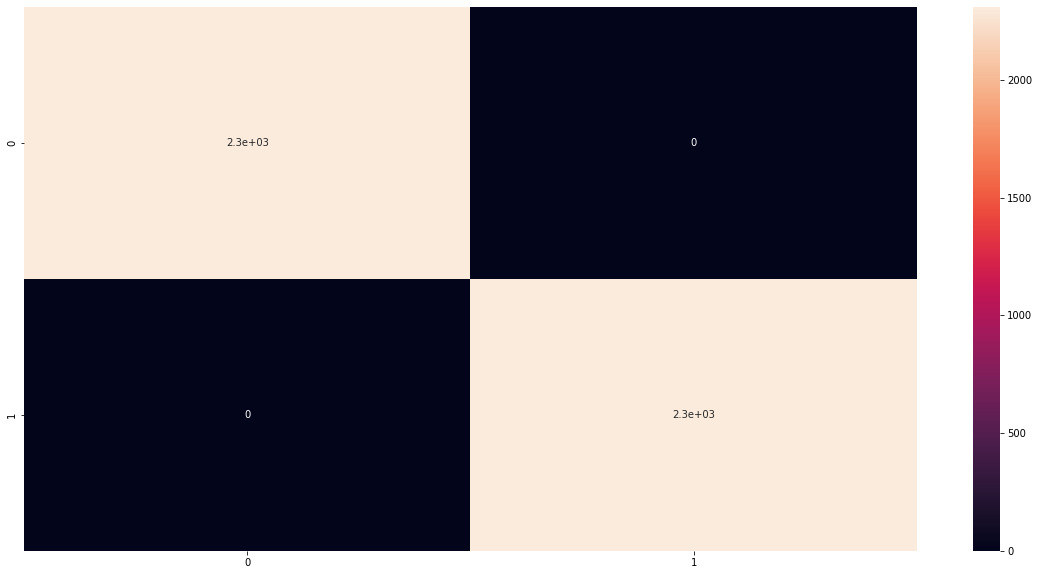

In [71]:
plt.figure(figsize = (20,10))
sns.heatmap(cm, annot=True)

<center>

<h1>

---



**CONCLUTION :** USE RandomForestClassifier for predicting



---

</h1>
<center>

## Saving Models 

In [72]:
import pickle

## save model
output = open('model.pkl', 'wb')
pickle.dump(model, output)
output.close()

##save normalizer
output = open('standardScaler.pkl', 'wb')
pickle.dump(std, output)
output.close()